In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/valid/DR/e265c870f9b3_png.rf.cd2a9553e1d9126fdb1abdca70a23719.jpg
/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/valid/DR/0318598cfd16_png.rf.674ae052c74229336803d9d26142fdb9.jpg
/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/valid/DR/57ce57a8cfb0_png.rf.a63fab8e595153cb09dd4fe4e304078e.jpg
/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/valid/DR/90c982cc2d96_png.rf.021da07a31e6ec8bb0869ba6ed892c5a.jpg
/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/valid/DR/95a4cc805c7b_png.rf.dc173d9dcbe945e700dbdd0efbbb347b.jpg
/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/valid/DR/4a693dd3921a_png.rf.d5a0993127d02b9104f956bb073465cf.jpg
/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/valid/DR/80b5a9519aec_png.rf.b

In [2]:
base_path = "/kaggle/input/diagnosis-of-diabetic-retinopathy/retino/train"
categories = ["DR", "No_DR"]

In [3]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [4]:
df.head()

,image_path,label
0,/kaggle/input/diagnosis-of-diabetic-retinopath...,DR
1,/kaggle/input/diagnosis-of-diabetic-retinopath...,DR
2,/kaggle/input/diagnosis-of-diabetic-retinopath...,DR
3,/kaggle/input/diagnosis-of-diabetic-retinopath...,DR
4,/kaggle/input/diagnosis-of-diabetic-retinopath...,DR


In [5]:
df.tail()

,image_path,label
2071,/kaggle/input/diagnosis-of-diabetic-retinopath...,No_DR
2072,/kaggle/input/diagnosis-of-diabetic-retinopath...,No_DR
2073,/kaggle/input/diagnosis-of-diabetic-retinopath...,No_DR
2074,/kaggle/input/diagnosis-of-diabetic-retinopath...,No_DR
2075,/kaggle/input/diagnosis-of-diabetic-retinopath...,No_DR


In [6]:
df.shape

(2076, 2)

In [7]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  2076 non-null   object
 1   label       2076 non-null   object
dtypes: object(2)
memory usage: 32.6+ KB


In [11]:
df.nunique()

image_path    2076
label            2
dtype: int64

In [12]:
df['label'].unique()

array(['DR', 'No_DR'], dtype=object)

In [13]:
df['label'].value_counts()

label
DR       1050
No_DR    1026
Name: count, dtype: int64

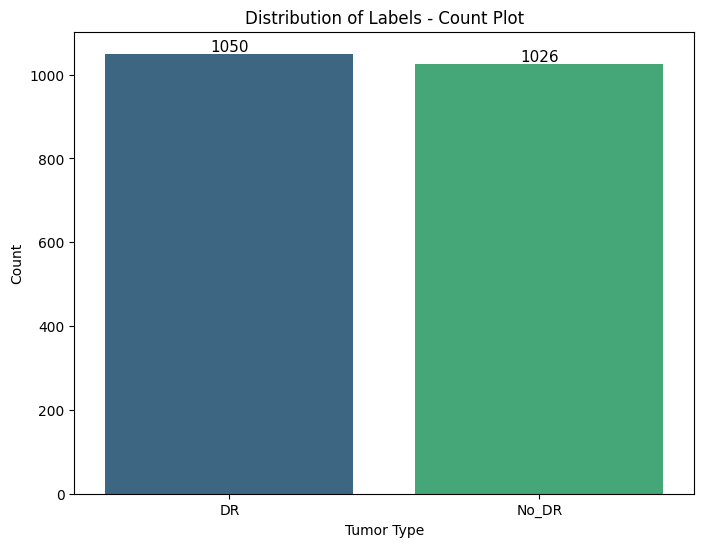

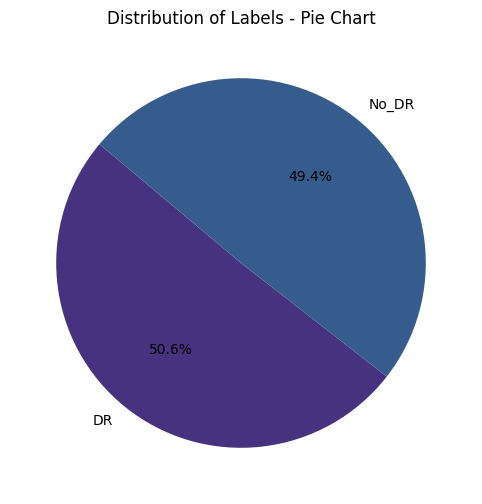

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

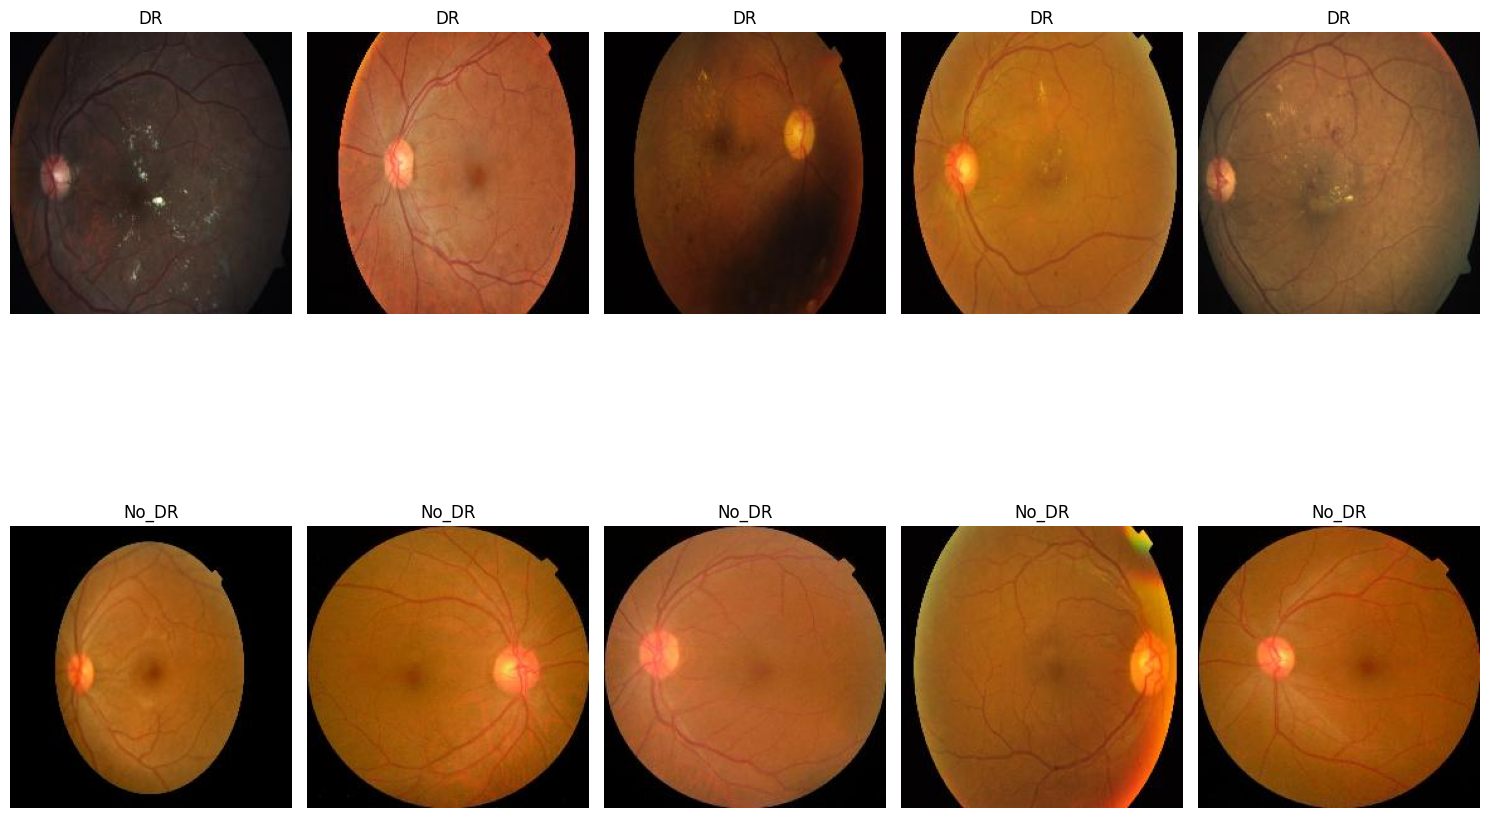

In [15]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [17]:
df = df[['image_path', 'category_encoded']]

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [21]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [22]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    1050
1    1050
Name: count, dtype: int64


In [23]:
df_resampled

,image_path,category_encoded
0,/kaggle/input/diagnosis-of-diabetic-retinopath...,0
1,/kaggle/input/diagnosis-of-diabetic-retinopath...,0
2,/kaggle/input/diagnosis-of-diabetic-retinopath...,0
3,/kaggle/input/diagnosis-of-diabetic-retinopath...,0
4,/kaggle/input/diagnosis-of-diabetic-retinopath...,0
...,...,...
2095,/kaggle/input/diagnosis-of-diabetic-retinopath...,1
2096,/kaggle/input/diagnosis-of-diabetic-retinopath...,1
2097,/kaggle/input/diagnosis-of-diabetic-retinopath...,1
2098,/kaggle/input/diagnosis-of-diabetic-retinopath...,1


In [24]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [25]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [26]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 1680 validated image filenames belonging to 2 classes.
Found 210 validated image filenames belonging to 2 classes.
Found 210 validated image filenames belonging to 2 classes.


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, GaussianNoise, 
                                     Input, MultiHeadAttention, Reshape)
from tensorflow.keras.optimizers import Adam

def create_vgg16_model(input_shape):
    inputs = Input(shape=input_shape)
    
    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512  
    x = Reshape((height * width, channels))(x)
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = GaussianNoise(0.25)(x)  
    x = Dropout(0.25)(x)  
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg16_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
import time

In [33]:
start_time = time.time()
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)
end_time = time.time()

Epoch 1/5


I0000 00:00:1732006058.591319     113 service.cc:145] XLA service 0x7e6b200078d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732006058.591381     113 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732006058.591387     113 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732006068.031458     141 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1284 bytes spill stores, 1272 bytes spill loads



  1/105 ━━━━━━━━━━━━━━━━━━━━ 41:44 24s/step - accuracy: 0.5625 - loss: 0.7086

I0000 00:00:1732006079.380757     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7252 - loss: 0.5188

I0000 00:00:1732006099.499420     202 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_7', 1280 bytes spill stores, 1268 bytes spill loads



105/105 ━━━━━━━━━━━━━━━━━━━━ 47s 219ms/step - accuracy: 0.7262 - loss: 0.5174 - val_accuracy: 0.9333 - val_loss: 0.1774
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9154 - loss: 0.2224 - val_accuracy: 0.9476 - val_loss: 0.1534
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9295 - loss: 0.1931 - val_accuracy: 0.9476 - val_loss: 0.1424
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.9347 - loss: 0.1772 - val_accuracy: 0.9476 - val_loss: 0.1365
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9401 - loss: 0.1673 - val_accuracy: 0.9381 - val_loss: 0.1307


In [34]:
inference_time = end_time - start_time
print(f"Inference time: {inference_time:.4f} seconds")

Inference time: 82.7220 seconds


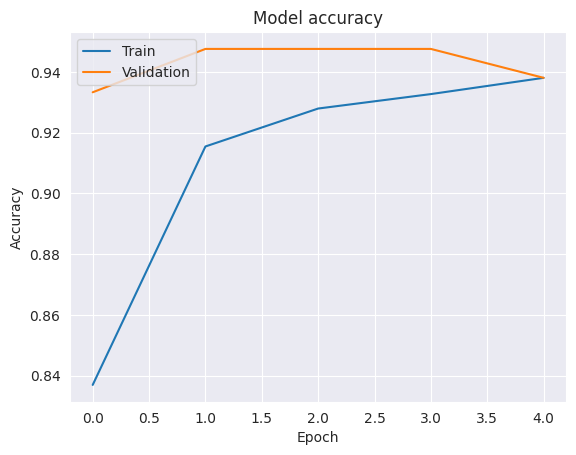

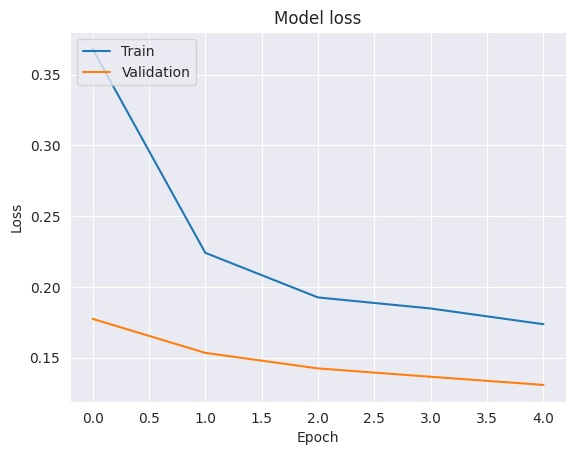

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step


In [37]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       105
           1       0.90      0.95      0.93       105

    accuracy                           0.92       210
   macro avg       0.93      0.92      0.92       210
weighted avg       0.93      0.92      0.92       210



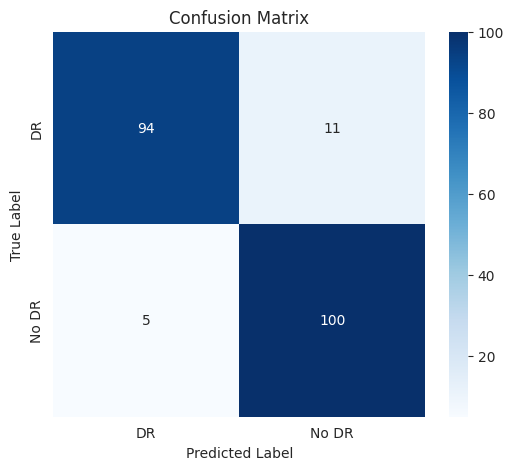

In [38]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['DR', 'No DR'], yticklabels=['DR', 'No DR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [39]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, GaussianNoise, 
                                     Input, MultiHeadAttention, Reshape)
from tensorflow.keras.optimizers import Adam

def create_lightweight_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = MobileNetV2(weights='imagenet', input_tensor=inputs, include_top=False)
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels))(x)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=channels)(x, x)
    attention_output = Reshape((height, width, channels))(attention_output)
    x = GaussianNoise(0.2)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = GaussianNoise(0.2)(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_lightweight_model(input_shape)
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
import time

In [41]:
start_time = time.time()
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)
end_time = time.time()

Epoch 1/5


I0000 00:00:1732006218.435003     316 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8572 - loss: 0.3152

I0000 00:00:1732006239.404086     366 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.8578 - loss: 0.3143 - val_accuracy: 0.9810 - val_loss: 0.0761
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9687 - loss: 0.1092 - val_accuracy: 0.9905 - val_loss: 0.0515
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9735 - loss: 0.0999 - val_accuracy: 0.9857 - val_loss: 0.0392
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9730 - loss: 0.0880 - val_accuracy: 0.9810 - val_loss: 0.0689
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9794 - loss: 0.0763 - val_accuracy: 0.9857 - val_loss: 0.0436


In [43]:
inference_time = end_time - start_time
print(f"Inference time: {inference_time:.4f} seconds")

Inference time: 60.6470 seconds


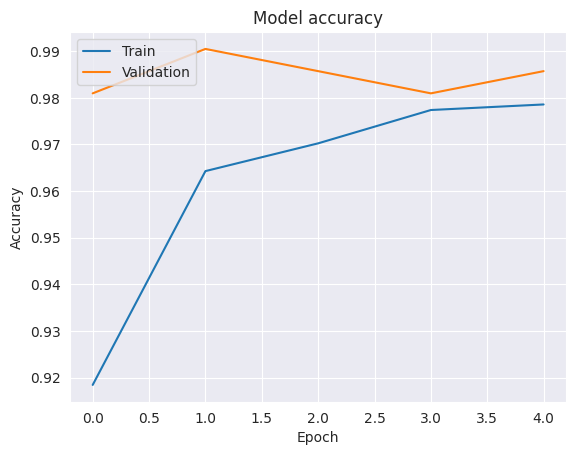

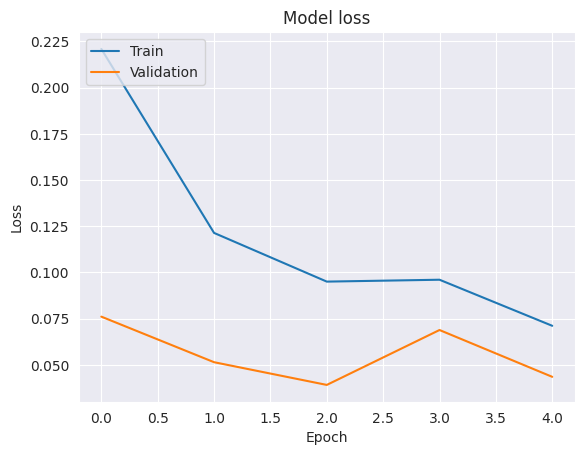

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [45]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step


In [46]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.94      0.95      0.95       105

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



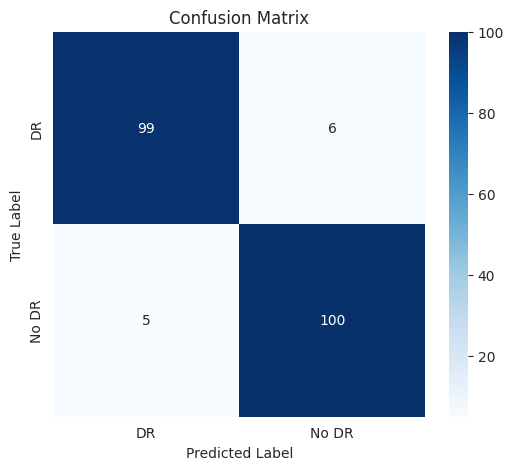

In [47]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['DR', 'No DR'], yticklabels=['DR', 'No DR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()